In [9]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import scipy.stats as stats
import seaborn as sns
from scipy.stats import normaltest
import statsmodels.api as sm
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------- -------------- 583.7/949.2 kB 12.2 MB/s eta 0:00:01
     ------------------------------------- 949.2/949.2 kB 12.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/119.4 kB ? eta -:--:--
   ---------------------------------------- 119.4/119.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.6 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 1


[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


******Getting Data from Yahoo Finance******

In [ ]:
start_date = "2019-12-31"
end_date = "2024-12-31"
def load_data(ticker):
    data = yf.download(ticker, start=start_date,end=end_date, interval='1d')
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('AAPL')
df = data[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['LogClose'] = np.log(df['Close'])
df['Stock_Return'] = df['Close'].pct_change()
#df.dropna(subset=['Stock_Return'], inplace=True)
df.head()

NameError: name 'yf' is not defined

**Plotting the Data**

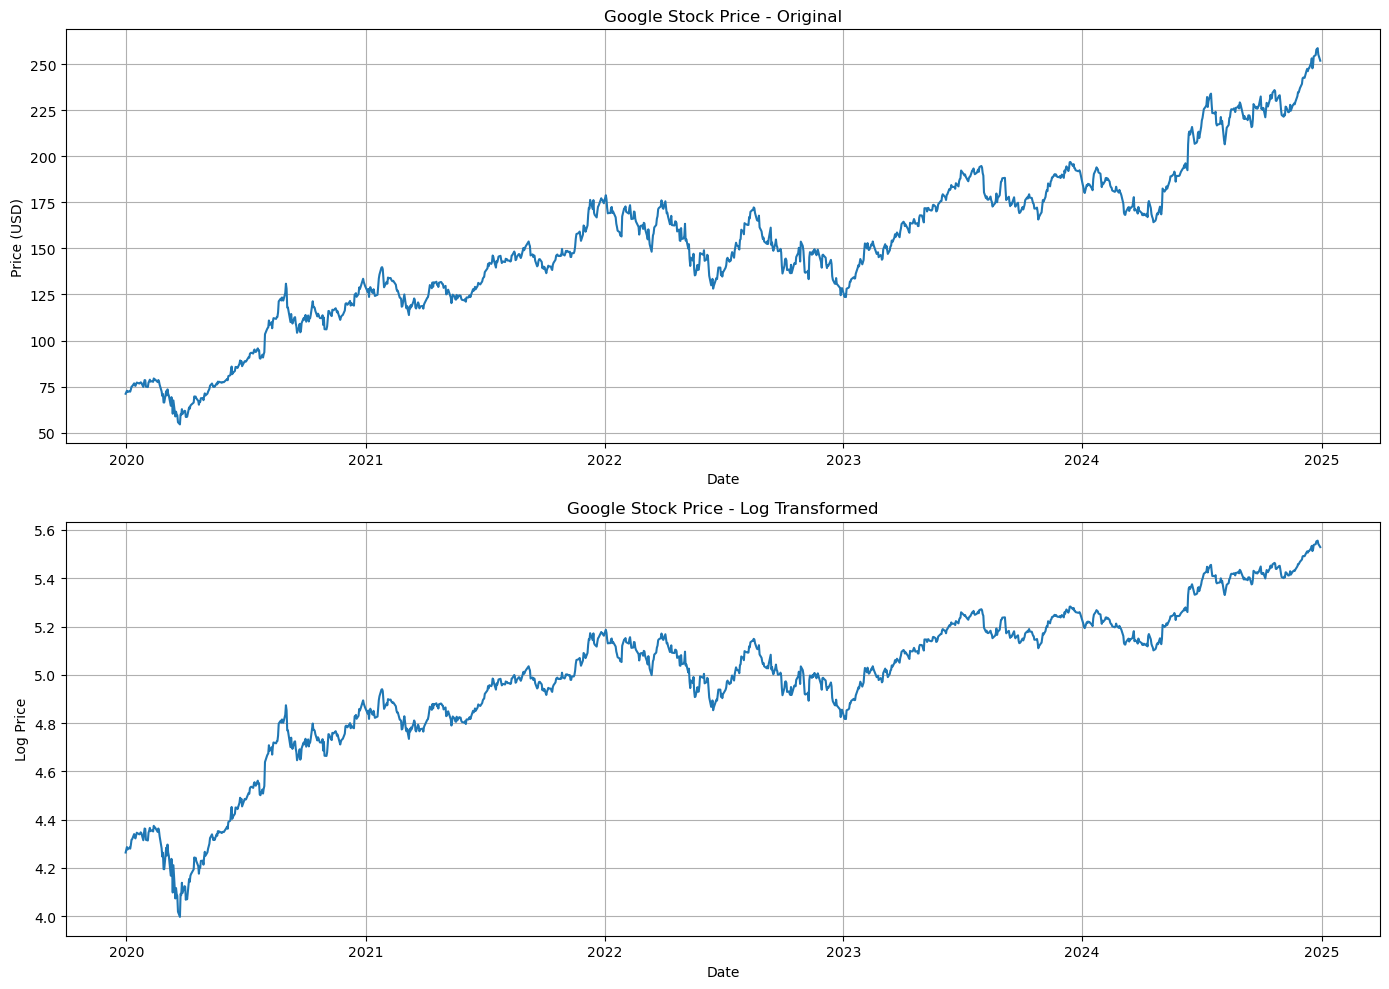

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
axes[0].plot(df['Close'])
axes[0].set_title("Google Stock Price - Original")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price (USD)")
axes[0].grid(True)

axes[1].plot(df['LogClose'])
axes[1].set_title("Google Stock Price - Log Transformed")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Log Price")
axes[1].grid(True)
plt.tight_layout()
plt.show()

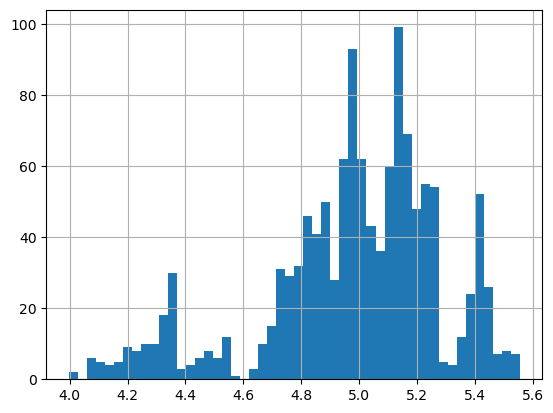

In [ ]:
df['LogClose'].hist(bins = 50)
plt.show()

In [ ]:
split_index = int(len(df) * 0.8)
train_data = df.iloc[:-100]
test_data = df.iloc[-100:]

print(train_data.shape)
print(test_data.shape)

(1158, 3)
(100, 3)


In [ ]:
train_data.head()

NameError: name 'train_data' is not defined

In [ ]:
test_data.head()

Price,Close,LogClose,Stock_Return
Ticker,AAPL,,
Date,,,
2024-08-08,212.595490,5.359391,0.016633
2024-08-09,215.515686,5.373034,0.013736
2024-08-12,217.052292,5.380138,0.007130
2024-08-13,220.784073,5.397185,0.017193
2024-08-14,221.233093,5.399217,0.002034


In [ ]:
result = adfuller(df['Close'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Null Hypothesis. So, Time Series is Stationary")
else:
    print ("Failed to reject Null Hypothesis. So, Time Series is Not-Stationary")
print("\n")

ADF Statistic: -0.690798
p-value: 0.849119
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Failed to reject Null Hypothesis. So, Time Series is Not-Stationary




In [ ]:
stat, p = normaltest(df['Close'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
alpha = 0.05
if p > alpha:
    print('Data is normally distributed (fail to reject H0)')
else:
    print('Data is not normally distributed(reject H0)')
print('\n')

Statistics=1.813, p=0.404
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Data is normally distributed (fail to reject H0)




/tmp/ipykernel_4386/1169944927.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Statistics=%.3f, p=%.3f' % (stat, p))


In [ ]:
result = adfuller(df['LogClose'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Null Hypothesis. So, Time Series is Stationary")
else:
    print ("Failed to reject Null Hypothesis. So, Time Series is Not-Stationary")
print("\n")

ADF Statistic: -1.397540
p-value: 0.583455
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Failed to reject Null Hypothesis. So, Time Series is Not-Stationary




In [ ]:
stat, p = normaltest(df['LogClose'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
alpha = 0.05
if p > alpha:
    print('Data is normally distributed (fail to reject H0)')
else:
    print('Data is not normally distributed(reject H0)')
print('\n')

Statistics=136.920, p=0.000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Data is not normally distributed(reject H0)




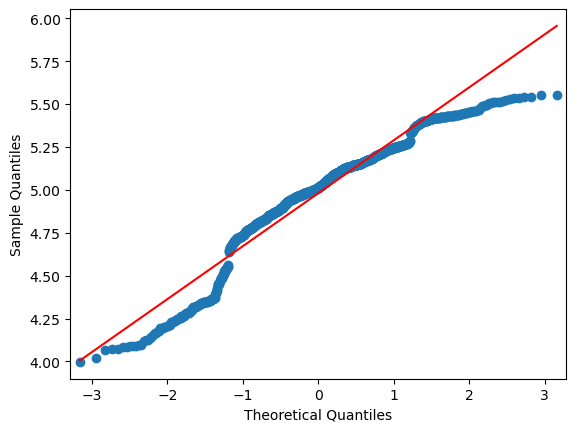

In [ ]:
fig = sm.qqplot(df['LogClose'], line='s')
plt.show()

In [ ]:
log_train = train_data['LogClose']

stepwise_model = auto_arima(
    log_train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=2,
    test='adf',
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Print best parameters
print(f"Best ARIMA order: {stepwise_model.order}")

# Fit the ARIMA model with the best found parameters
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=stepwise_model.order)
model_fit = model.fit()

# Forecast
forecast_obj = model_fit.get_forecast(steps=len(test_data))
arima_preds_exp = np.exp(forecast_obj.predicted_mean)  # revert from log scale
conf_int = forecast_obj.conf_int()
conf_int_exp = np.exp(conf_int)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-4772.695, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-5211.843, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-5589.064, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-4774.695, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-5668.311, Time=0.40 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-5674.017, Time=0.52 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-5694.652, Time=0.89 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-5690.463, Time=0.92 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=-5679.308, Time=0.96 sec
 ARIMA(1,2,5)(0,0,0)[0] intercept   : AIC=-5691.523, Time=1.26 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=i

/home/rathorepriten/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rathorepriten/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rathorepriten/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rathorepriten/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

In [ ]:
arima_preds = model_fit.forecast(steps=100)
arima_preds_exp = np.exp(arima_preds)
print(arima_preds_exp)


1158    209.157648
1159    209.478787
1160    209.629559
1161    209.824544
1162    210.019710
           ...    
1253    228.561347
1254    228.773940
1255    228.986732
1256    229.199721
1257    229.412909
Name: predicted_mean, Length: 100, dtype: float64


/home/rathorepriten/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
arima_mae = mean_absolute_error(test_data['Close'], arima_preds_exp)
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_preds_exp))
arima_r2 = r2_score(test_data['Close'], arima_preds_exp)

print(f"\nARIMA Performance Metrics:")
print(f"MAE: {arima_mae:.2f}")
print(f"RMSE: {arima_rmse:.2f}")
print(f"R²: {arima_r2:.4f}")


ARIMA Performance Metrics:
MAE: 11.60
RMSE: 13.43
R²: -0.6613


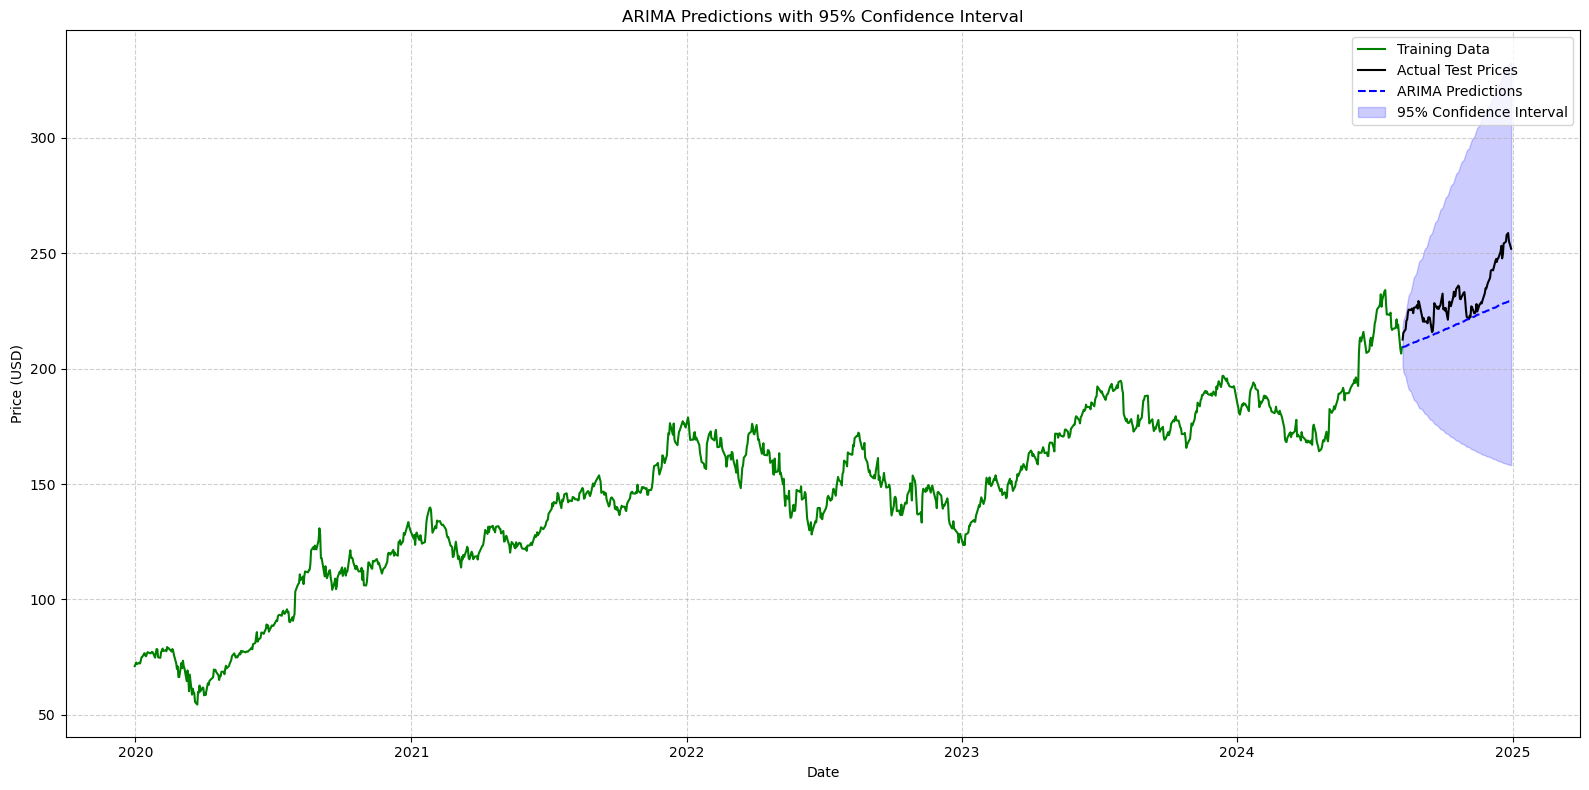

In [ ]:
plt.figure(figsize=(16, 8))

# Training data
plt.plot(train_data.index, train_data['Close'], label='Training Data', color='green')

# Actual test data
plt.plot(test_data.index, test_data['Close'], label='Actual Test Prices', color='black')

# ARIMA predictions
plt.plot(test_data.index, arima_preds_exp, label='ARIMA Predictions', linestyle='--', color='blue')

# Confidence intervals
plt.fill_between(
    test_data.index,
    conf_int_exp.iloc[:, 0],
    conf_int_exp.iloc[:, 1],
    color='blue',
    alpha=0.2,
    label='95% Confidence Interval'
)

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('ARIMA Predictions with 95% Confidence Interval')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Scaling the Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']])

In [ ]:
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(x), np.array(y)

window_size = 60
x_all, y_all = create_sequences(scaled_data, window_size)

In [ ]:
split_index = len(x_all) - 100
x_train, x_test = x_all[:split_index], x_all[split_index:]
y_train, y_test = y_all[:split_index], y_all[split_index:]

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=60, activation='relu', return_sequences=True))
model_LSTM.add(Dropout(0.3))
model_LSTM.add(LSTM(units=80, activation='relu', return_sequences=True))
model_LSTM.add(Dropout(0.4))
model_LSTM.add(LSTM(units=120, activation='relu'))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(units=1))
model_LSTM.summary()

/home/rathorepriten/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model_LSTM.fit(x_train, y_train, epochs=100, batch_size=111)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.1156 - mean_absolute_error: 0.2827
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0116 - mean_absolute_error: 0.0860
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0083 - mean_absolute_error: 0.0705
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0083 - mean_absolute_error: 0.0710
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0079 - mean_absolute_error: 0.0699
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0076 - mean_absolute_error: 0.0667
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0070 - mean_absolute_error: 0.0630
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0060 - mean_absolute_error: 0.0605
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0063 - mean_absolute_error: 0.0611
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0063 - mean_absolute_error: 0.0600
Epoch 11/100
35/35 ━━━━━━━━━━

In [ ]:
y_pred = model_LSTM.predict(x_test)
y_pred_scaled_back = scaler.inverse_transform(y_pred)
y_test_scaled_back = scaler.inverse_transform(y_test.reshape(-1, 1))
print(y_pred_scaled_back)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
[[202.6267 ]
 [201.08197]
 [200.31328]
 [200.5073 ]
 [201.69942]
 [203.43765]
 [205.35143]
 [207.11671]
 [208.41672]
 [209.19249]
 [209.5166 ]
 [209.40599]
 [209.20323]
 [209.12666]
 [209.29501]
 [209.57556]
 [210.0733 ]
 [210.69243]
 [210.87215]
 [210.42247]
 [209.63832]
 [208.7451 ]
 [207.95453]
 [207.3555 ]
 [207.14197]
 [207.29051]
 [207.64159]
 [207.60345]
 [207.10527]
 [206.58263]
 [206.82835]
 [207.90648]
 [209.20238]
 [210.27997]
 [210.88992]
 [211.13051]
 [211.16524]
 [211.49626]
 [211.68732]
 [211.63216]
 [211.34343]
 [211.01643]
 [210.45496]
 [209.95262]
 [209.9343 ]
 [210.398  ]
 [211.02753]
 [211.84506]
 [212.91713]
 [213.89583]
 [214.58061]
 [215.14021]
 [215.73978]
 [216.30237]
 [216.37587]
 [215.97217]
 [215.36115]
 [214.92001]
 [214.81961]
 [214.78978]
 [214.40318]
 [213.48814]
 [212.19585]
 [210.86107]
 [209.77026]
 [209.3668 ]
 [209.6297 ]
 [210.10309]
 [210.47379]
 [210.691  ]
 [210.9881 ]
 [211.1605 ]
 [211.33388]
 [211.55919]

In [ ]:
mae = mean_absolute_error(test_data['Close'], y_pred_scaled_back)
print(f'Mean Absolute Error (MAE): {round(mae, 2)}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Close'], y_pred_scaled_back)
print(f'Mean Squared Error (MSE): {round(mse, 2)}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {round(rmse, 2)}')

# Calculate R-squared (R²)
r2 = r2_score(test_data['Close'], y_pred_scaled_back)
print(f'R-squared (R²): {round(r2, 2)}')

# Calculate Spearman's Correlation
spearman_corr, _ = spearmanr(test_data['Close'], y_pred_scaled_back)
print(f'Spearman Correlation: {round(spearman_corr, 2)}')

Mean Absolute Error (MAE): 17.67
Mean Squared Error (MSE): 334.8
Root Mean Squared Error (RMSE): 18.3
R-squared (R²): -2.09
Spearman Correlation: 0.81


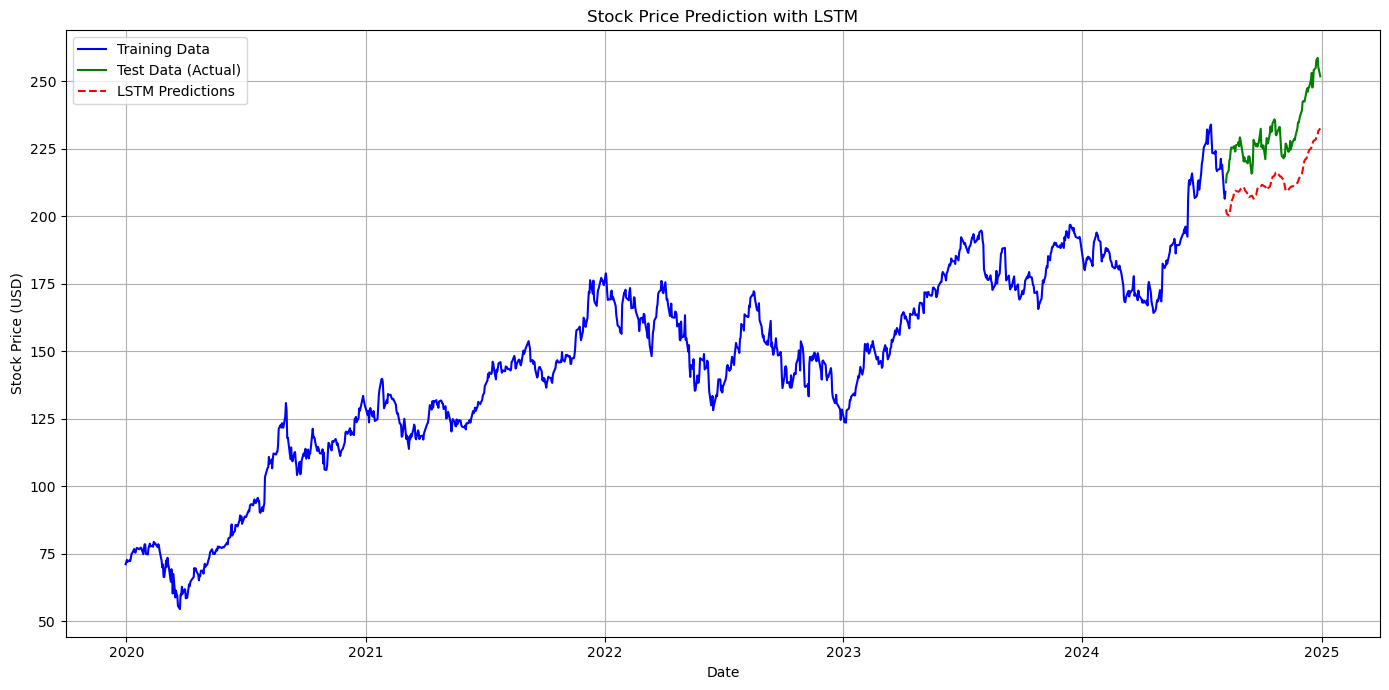

In [ ]:
# Let's assume the test data's 'Close' is the actual values we want to compare with predictions
# And we assume predicted_values is the output from your trained LSTM model

# Plotting the data
plt.figure(figsize=(14,7))

# Plot the training data
plt.plot(train_data.index, train_data['Close'], label='Training Data', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['Close'], label='Test Data (Actual)', color='green')

# Plot the LSTM predictions
plt.plot(test_data.index, y_pred_scaled_back, label='LSTM Predictions', color='red', linestyle='--')

# Adding labels and title
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


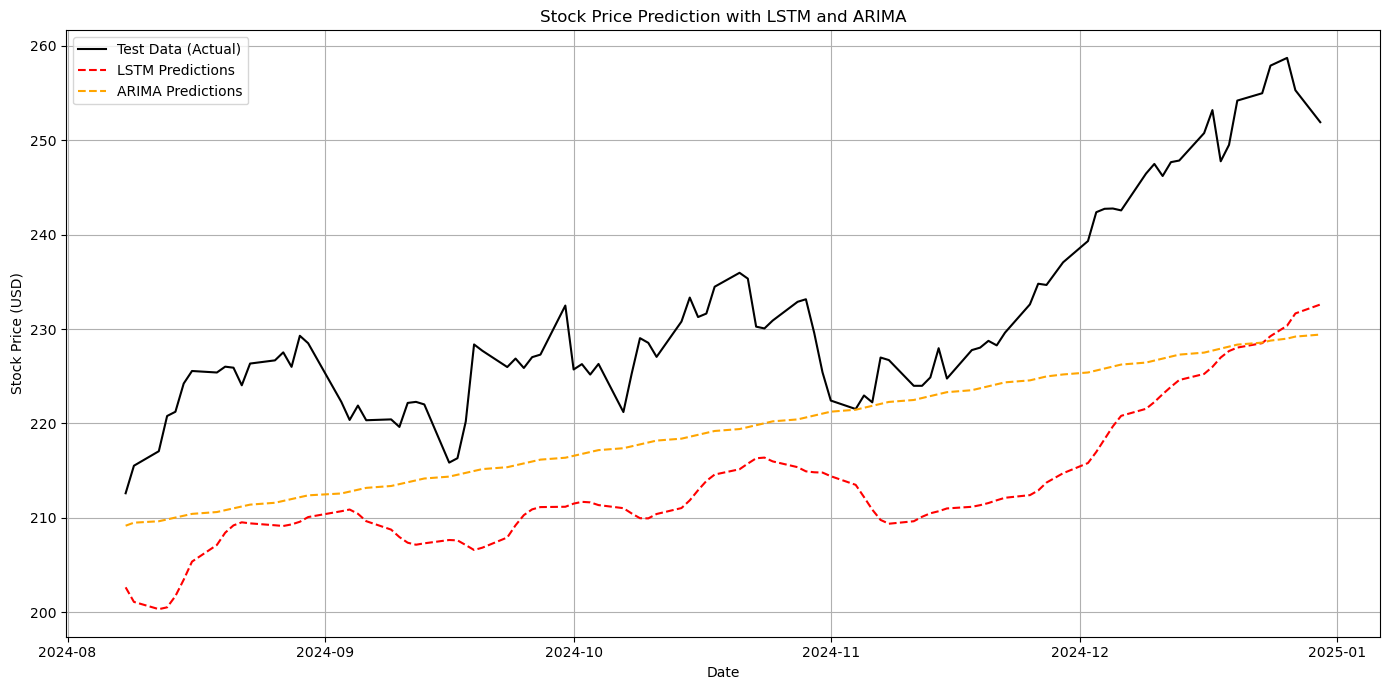

In [ ]:
plt.figure(figsize=(14,7))

# Plot the test data (actual)
plt.plot(test_data.index, test_data['Close'], label='Test Data (Actual)', color='black')

# Plot the LSTM predictions
plt.plot(test_data.index, y_pred_scaled_back, label='LSTM Predictions', color='red', linestyle='--')

# Plot the ARIMA predictions
plt.plot(test_data.index, arima_preds_exp, label='ARIMA Predictions', color='orange', linestyle='--')

# Adding labels and title
plt.title('Stock Price Prediction with LSTM and ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
ff_factors = pd.read_csv('FamaFrenchFactors.CSV', skiprows=3)
ff_factors.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,20191231,0.28,0.01,0.12,-0.12,0.25,0.007
1,20200102,0.86,-0.97,-0.33,0.24,-0.22,0.006
2,20200103,-0.67,0.30,0.00,-0.13,-0.11,0.006
3,20200106,0.36,-0.21,-0.55,-0.17,-0.26,0.006
4,20200107,-0.19,-0.03,-0.25,-0.13,-0.24,0.006


In [ ]:
X_factors = ff_factors[["Date", "Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"]].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ff_factors[["Date", "Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"]])
ff_factors[["Date", "Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"]] = scaled_data
print(ff_factors.head())

       Date    Mkt-RF       SMB       HML       RMW       CMA        RF
0 -2.072169  0.164990  0.020543  0.106120 -0.222938  0.432238 -0.251509
1 -1.446592  0.586158 -1.156707 -0.286784  0.328344 -0.385043 -0.360398
2 -1.446522 -0.524853  0.368913  0.001345 -0.238252 -0.193765 -0.360398
3 -1.446310  0.223082 -0.243738 -0.478871 -0.299506 -0.454599 -0.360398
4 -1.446240 -0.176301 -0.027508 -0.216935 -0.238252 -0.419821 -0.360398


In [ ]:
y = df['Stock_Return'].values
print(y)

[        nan  0.0228164  -0.00972213 ...  0.00317568 -0.01324213
 -0.01326343]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_factors[:-2], y[1:], test_size=0.2, random_state=42)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge Regression): {mse}")

Mean Squared Error (Ridge Regression): 0.0005657035515615371


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 0.0006388763620115913


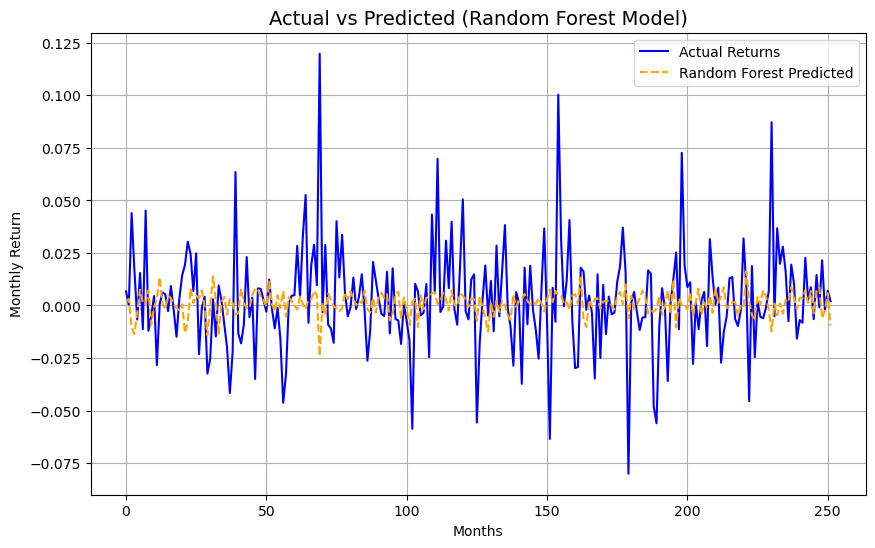

In [ ]:
y_test_series = pd.Series(y_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_series.reset_index(drop=True), label='Actual Returns', color='blue')
plt.plot(y_pred_rf, label='Random Forest Predicted', color='orange', linestyle='--')
plt.title('Actual vs Predicted (Random Forest Model)', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()

Best Parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


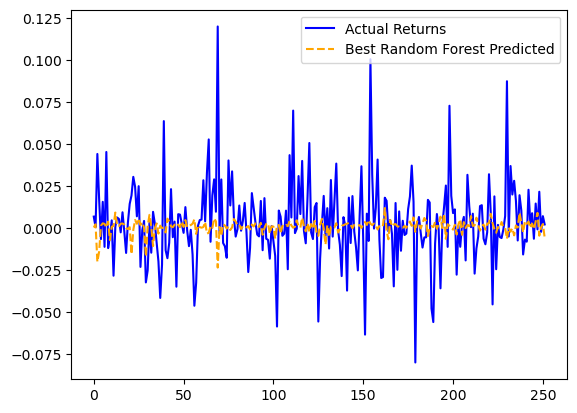

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate on test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Plotting the results
plt.plot(y_test_series.reset_index(drop=True), label='Actual Returns', color='blue')
plt.plot(y_pred_best_rf, label='Best Random Forest Predicted', color='orange', linestyle='--')
plt.legend()
plt.show()